# CAFA5 Training Set Description 

#### CAFA 5 Protein Function Prediction Competition
https://www.kaggle.com/competitions/cafa-5-protein-function-prediction/overview

Dataset: 
https://www.kaggle.com/competitions/cafa-5-protein-function-prediction/data

This notebook uses code provided by: 

The Erdös Institute May 2023 Bootcamp
https://github.com/TheErdosInstitute/code-2023


## An overview of Gene Ontology. 
https://www.kaggle.com/competitions/cafa-5-protein-function-prediction/data

### Gene Ontology consists of three subontologies: Molecular Function (MF), Biological Process (BP), and Cellular Component (CC)

These can be described by what it does on a molecular level (MF), which biological processes it participates in (BP) and where in the cell it is located (CC)

This dataset uses experimentally determined protein assignments.

#### Training Set
For the training set, we include all proteins with annotated terms that have been validated by experimental or high-throughput evidence, traceable author statement (evidence code TAS), or inferred by curator (IC). More information about evidence codes can be found here. We use annotations from the UniProtKB release of 2022-11-17. The participants are not required to use these data and are also welcome to use any other data available to them.

#### Test Superset
The test superset is a set of protein sequences on which the participants are asked to predict GO terms.

#### Test Set
The test set is unknown at the beginning of the competition. It will contain protein sequences (and their functions) from the test superset that gained experimental annotations between the submission deadline and the time of evaluation.

# File Descriptions

### Training Sequences

Training sequences: train_sequences.fasta contains the protein sequences for the training dataset.
This files are in FASTA format, a standard format for describing protein sequences. The proteins were all retrieved from the UniProt data set curated at the European Bioinformatics Institute.
The header contains the protein's UniProt accession ID and additional information about the protein. Most protein sequences were extracted from the Swiss-Prot database, but a subset of proteins that are not represented in Swiss-Prot were extracted from the TrEMBL database. In both cases, the sequences come from the 2022_05 release from 14-Dec-2022. More information can be found at https://www.uniprot.org/help/uniprotkb_sections.

The train_sequences.fasta file will indicate from which database the sequence originate. For example, sp|P9WHI7|RECN_MYCT in the FASTA header indicates the protein with UniProt ID P9WHI7 and gene name RECN_MYCT was taken from Swiss-Prot (sp). Any sequences taken from TrEMBL will have tr in the header instead of sp. Swiss-Prot and TrEMBL are both parts of UniProtKB.

This file contains only sequences for proteins with annotations in the dataset (labeled proteins). To obtain the full set of protein sequences for unlabeled proteins, the Swiss-Prot and TrEMBL databases can be found here https://www.uniprot.org/help/downloads.
                     

In [1]:
# !pip install Bio

import pandas as pd
import numpy as np
import zipfile
import os
import seaborn as sns
from Bio import SeqIO

# unzip files too large for github
with zipfile.ZipFile("../Data/Train/train_sequences.fasta.zip", 'r') as zip_ref:
    zip_ref.extractall("../Data/Train/")
    
with zipfile.ZipFile("../Data/Train/train_terms.tsv.zip", 'r') as zip_ref:
    zip_ref.extractall("../Data/Train/")
        

names, sequences = [],[]

fasta_sequences = SeqIO.parse(open("../Data/Train/train_sequences.fasta"),'fasta')
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    names.append(name)
    sequences.append(sequence)

print(names)
print(sequences)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
fasta = pd.DataFrame({'EntryID': names,'Sequence': sequences})
fasta

,EntryID,Sequence
0,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...
1,O73864,MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...
2,O95231,MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...
3,A0A0B4J1F4,MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...
4,P54366,MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...
...,...,...
142241,A0A286YAI0,METEVDDFPGKASIFSQVNPLYSNNMKLCEAERYDFQHSEPKTMKS...
142242,A0A1D5NUC4,MSAAASAEMIETPPVLNFEEIDYKEIEVEEVVGRGAFGVVCKAKWR...
142243,Q5RGB0,MADKGPILTSVIIFYLSIGAAIFQILEEPNLNSAVDDYKNKTNNLL...
142244,A0A2R8QMZ5,MGRKKIQITRIMDERNRQVTFTKRKFGLMKKAYELSVLCDCEIALI...


### Labels: 

train_terms.tsv contains the list of annotated terms (ground truth) for the proteins in train_sequences.fasta. The first column indicates the protein's UniProt accession ID, the second is the GO term ID, and the third indicates in which ontology the term appears.



In [3]:
TermsFile = pd.read_csv("../Data/Train/train_terms.tsv", sep="\t")
Terms = pd.DataFrame(TermsFile)
Terms


,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
2,A0A009IHW8,GO:0072523,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO
...,...,...,...
5363858,X5L565,GO:0050649,MFO
5363859,X5L565,GO:0016491,MFO
5363860,X5M5N0,GO:0005515,MFO
5363861,X5M5N0,GO:0005488,MFO


In [4]:
Terms = Terms.merge(fasta, 'outer')

### Taxonomy: 

train_taxonomy.tsv contains the list of proteins and the species to which they belong, represented by a "taxonomic identifier" (taxon ID) number. The first column is the protein UniProt accession ID and the second is the taxon ID. More information about taxonomies can he found here https://www.uniprot.org/help/taxonomic_identifier.

In [5]:
TaxonomyFile = pd.read_csv("../Data/Train/train_taxonomy.tsv", sep="\t")
Taxonomy = pd.DataFrame(TaxonomyFile)
Taxonomy

,EntryID,taxonomyID
0,Q8IXT2,9606
1,Q04418,559292
2,A8DYA3,7227
3,Q9UUI3,284812
4,Q57ZS4,185431
...,...,...
142241,Q5TD07,9606
142242,A8BB17,7955
142243,A0A2R8QBB1,7955
142244,P0CT72,284812


In [6]:
Terms = Terms.merge(Taxonomy, 'outer')

# Information Accretion (IA)
Information accretion: IA.txt contains the information accretion (weights) for each GO term. These weights are used to compute weighted precision and recall. The values of this file were computed using the following code repo. (https://github.com/claradepaolis/InformationAccretion)

In [7]:
IAFile = pd.read_csv("../Data/IA.txt", sep="\t")
IA = pd.DataFrame(IAFile)

IA

,term,IA
0,GO:0000001,0.000000
1,GO:0000002,3.103836
2,GO:0000003,3.439404
3,GO:0000011,0.056584
4,GO:0000012,6.400377
...,...,...
43243,GO:2001083,7.159871
43244,GO:2001084,7.592457
43245,GO:2001085,7.159871
43246,GO:2001147,5.554589


In [8]:
Terms = Terms.merge(IA, 'outer')

In [9]:
Terms

,EntryID,term,aspect,Sequence,taxonomyID,IA
0,A0A009IHW8,GO:0008152,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,1310613.0,1.598544
1,A0A023I7E1,GO:0008152,BPO,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,4839.0,1.598544
2,A0A024CBD6,GO:0008152,BPO,MMAFCALRKALPCRPENPFSSRCFVEILWVSLALVFLLPMPSDACD...,9823.0,1.598544
3,A0A024RAD5,GO:0008152,BPO,MGYFRCAGAGSFGRRRKMEPSTAARAWALFWLLLPLLGAVCASGPR...,9606.0,1.598544
4,A0A031WDE4,GO:0008152,BPO,MARGTFERTKKLREESINAEPHISIERAVLMTEAYKKYEGSVEIPV...,1496.0,1.598544
...,...,...,...,...,...,...
5375640,NaN,GO:2001081,NaN,NaN,NaN,7.159871
5375641,NaN,GO:2001082,NaN,NaN,NaN,7.159871
5375642,NaN,GO:2001083,NaN,NaN,NaN,7.159871
5375643,NaN,GO:2001084,NaN,NaN,NaN,7.592457


In [10]:
#Adding in Gene Ontology Name

import obonet #https://pypi.org/project/obonet/
import networkx

ontologyDataFile = "../Data/Train/go-basic.obo" 
obonet.read_obo(ontologyDataFile)

# Read the taxrank ontology
graph = obonet.read_obo(ontologyDataFile)


In [11]:
Terms["name"] = [graph.nodes[x]["name"] for x in Terms["term"]]


In [ ]:
Terms.head()

In [12]:
# Check for null values
Terms.isnull().sum()


EntryID       11782
term              0
aspect        11782
Sequence      11782
taxonomyID    11782
IA                0
name              0
dtype: int64

In [13]:
# Drop the null values introduced from adding the IA file 
Terms.dropna(subset = ['EntryID'], inplace = True )

In [14]:
Terms

,EntryID,term,aspect,Sequence,taxonomyID,IA,name
0,A0A009IHW8,GO:0008152,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,1310613.0,1.598544,metabolic process
1,A0A023I7E1,GO:0008152,BPO,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,4839.0,1.598544,metabolic process
2,A0A024CBD6,GO:0008152,BPO,MMAFCALRKALPCRPENPFSSRCFVEILWVSLALVFLLPMPSDACD...,9823.0,1.598544,metabolic process
3,A0A024RAD5,GO:0008152,BPO,MGYFRCAGAGSFGRRRKMEPSTAARAWALFWLLLPLLGAVCASGPR...,9606.0,1.598544,metabolic process
4,A0A031WDE4,GO:0008152,BPO,MARGTFERTKKLREESINAEPHISIERAVLMTEAYKKYEGSVEIPV...,1496.0,1.598544,metabolic process
...,...,...,...,...,...,...,...
5363858,Q9VMG0,GO:0019186,MFO,MSAITIRAMTIGDYEEVEAFLAVHFFKQEPLMLIPQEDPKQSEVSS...,7227.0,7.592457,acyl-CoA N-acyltransferase activity
5363859,Q9XHE6,GO:0018674,MFO,MELLQLWSALIILVVTYTISLLINQWRKPKPQGKFPPGPPKLPLIG...,34256.0,0.415037,(S)-limonene 3-monooxygenase activity
5363860,Q9XHE7,GO:0018674,MFO,MELQISSAIIILVVTYTISLLIIKQWRKPKPQENLPPGPPKLPLIG...,34256.0,0.415037,(S)-limonene 3-monooxygenase activity
5363861,Q9Z4P6,GO:0050002,MFO,MSITLESAKEHANDLAVLCCRAEEGTVIGPSNLEDPAIFGDLEDSG...,499177.0,0.000000,D-proline reductase (dithiol) activity


In [15]:
# Investigate all the elements whithin each Feature 
for column in Terms:
    unique_values = np.unique(Terms[column])
    print(unique_values)
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

['A0A009IHW8' 'A0A021WW32' 'A0A021WZA4' ... 'X6RLP6' 'X6RLR1' 'X6RM59']
The number of values for feature EntryID is: 142246
['GO:0000001' 'GO:0000002' 'GO:0000003' ... 'GO:2001315' 'GO:2001316'
 'GO:2001317']
The number of values for feature term is: 31466
['BPO' 'CCO' 'MFO']
The number of values for feature aspect is: 3 -- ['BPO' 'CCO' 'MFO']
['AAAAAAPLPAGGCRCRCRCRHHRLWGPRAERRPPRSTNPAVPPAAEGPGPAWPAPPAPPARASVRPPAPAGPAWRGRPPPPRSSSCSGGPRPAASRACRPALRAAPPPPSAPRGAPRSRPPCPARPRAVGPGSTPSNQDDYQLVRKLGRGKYSEVFEAINITNNERVVVKILKPVKKKKIKREVKILENLRGGTNIIKLIDTVKDPVQLYQILTDFDIRFYMYELLKALDYCHSKGIMHRDVKPHNVMIDHQQKKLRLIDWGLAEFYHPAQEYNVRVASRYFKGPELLVDYQMYDYSLDMWSLGCMLASMIFRKEPFFHGQDNYDQLVRIAKVLGTDDLYGYLKKYHIDLDPHFNDILGQHSRKRWENFIHSENRHLVSPEALDLLDKLLRYDHQQRLTAKEAMEHPYFYPVVKEQSQPCAENTVLSSGLTAAR'
 'AAAALNGVDRRSLQRSARLALEVLERAKRRAVDWHALERPKGCMGVLAREAPHLEKQPAAGPQRVLPGEKYYSSVPEEGGATHVYRYHRGESKLHMCLDIGNGQAENISKDLYIEVYPGTYSVTVGSNDLTKKTHVVAVDSGQSVDLVFPV'
 'AAAAVPRRGPRGGPGRSYTADAGYAPATPAAAGAAAGKATTEEQKLIEDINVGFKAAVA

<AxesSubplot:xlabel='aspect', ylabel='count'>

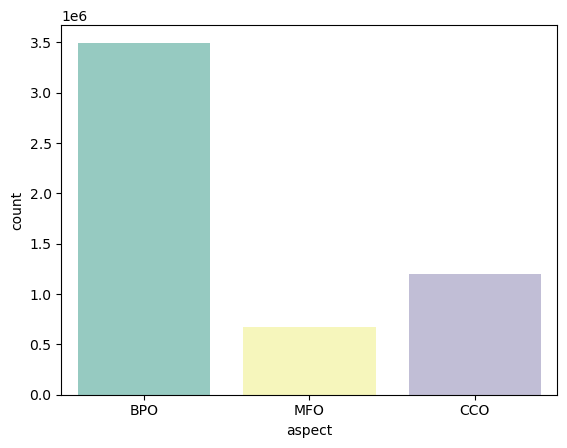

In [16]:
# Investigating the balance of Aspect: BP, MF, CC
sns.countplot(x = 'aspect', data = Terms, palette = 'Set3')

In [17]:
item_counts = Terms["name"].value_counts(normalize=False)
print(item_counts[0:100])
print(item_counts[-100:-1])

cellular_component                                        92912
biological_process                                        92210
cellular anatomical entity                                91286
molecular_function                                        78637
intracellular anatomical structure                        70785
                                                          ...  
regulation of DNA-templated transcription                  8668
positive regulation of macromolecule metabolic process     8635
signal transduction                                        8623
extracellular region                                       8548
reproduction                                               8499
Name: name, Length: 100, dtype: int64
3-(3-hydroxyphenyl)propionate hydroxylase activity                                         1
[citrate (pro-3S)-lyase] ligase activity                                                   1
protein-phosphocysteine-N-acetylmuramate phosphotransferase system trans

In [18]:
#delete unzipped files
os.remove('../Data/Train/train_terms.tsv')
os.remove('../Data/Train/train_sequences.fasta')
